<a href="https://colab.research.google.com/github/RainLiu0611/441ML/blob/main/HW5_XinyuLiu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from imblearn.over_sampling import SMOTENC

In [15]:
data = pd.read_csv("/card_transdata.csv")

In [16]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
#question1: For each 𝛾 ∈ {0.1, 0.2, … , 1}, oversample the training set with the desired ratio 𝛾 of the
#number of samples in the minority class over the number of samples in the majority class.

In [20]:
# Separate features and target variable and generate the training and test sets
X_train = data.iloc[:500000,:7]
X_test = data.iloc[500000:,:7]
y_train = data.iloc[:500000,7:]
y_test = data.iloc[500000:,7:]


In [21]:
from collections import Counter
categorical_indices = [3,4,5,6]
# Define the range of gamma values
gamma_values = np.arange(0.1, 1.1, 0.1)
# Calculate the number of minority class samples
num_minority_samples = np.sum(y_train == 1)

In [22]:
# Create a dictionary to store the resampled datasets for each gamma value
resampled_datasets = {}

# Loop through each gamma value
for gamma in gamma_values:
    # Calculate the number of minority class samples to be oversampled
    minority_class_samples = int(gamma * np.sum(y_train == 0))

    # Initialize SMOTENC with the desired minority class samples and categorical feature indices
    smote_nc = SMOTENC(sampling_strategy={1: minority_class_samples}, categorical_features=categorical_indices, random_state=42)

    # Apply SMOTE-NC to the training data
    X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

    # Store the resampled dataset in the dictionary
    resampled_datasets[gamma] = (X_train_resampled, y_train_resampled)

    # Print the class distribution after resampling for each gamma value
    print(f"Gamma: {gamma}, Class distribution after resampling: {Counter(y_train_resampled)}")

Gamma: 0.1, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.2, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.30000000000000004, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.4, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.5, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.6, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.7000000000000001, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.8, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 0.9, Class distribution after resampling: Counter({'fraud': 1})
Gamma: 1.0, Class distribution after resampling: Counter({'fraud': 1})


In [23]:
#question2 For each of the resulting oversampled datasets, fit a decision tree (with information gain as
#the feature selection criterion) and calculate its training and testing recall, precision, and 𝐹1 score.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [25]:
# Create dictionaries to store evaluation metrics for each gamma value
train_metrics = {}
test_metrics = {}

# Loop through each gamma value
for gamma, (X_train_resampled, y_train_resampled) in resampled_datasets.items():
    # Initialize DecisionTreeClassifier with information gain as the criterion
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

    # Fit the decision tree on the resampled training data
    dt_classifier.fit(X_train_resampled, y_train_resampled)

    # Predictions on training set
    y_train_pred = dt_classifier.predict(X_train_resampled)
    # Predictions on test set
    y_test_pred = dt_classifier.predict(X_test)

    # Calculate training metrics
    train_precision = precision_score(y_train_resampled, y_train_pred)
    train_recall = recall_score(y_train_resampled, y_train_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred)

    # Calculate testing metrics
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Store metrics in dictionaries
    train_metrics[gamma] = {'Precision': train_precision, 'Recall': train_recall, 'F1': train_f1}
    test_metrics[gamma] = {'Precision': test_precision, 'Recall': test_recall, 'F1': test_f1}

# Print evaluation metrics for each gamma value
print("Training Metrics:")
for gamma, metrics in train_metrics.items():
    print(f"Gamma: {gamma}, Precision: {metrics['Precision']}, Recall: {metrics['Recall']}, F1: {metrics['F1']}")

print("\nTesting Metrics:")
for gamma, metrics in test_metrics.items():
    print(f"Gamma: {gamma}, Precision: {metrics['Precision']}, Recall: {metrics['Recall']}, F1: {metrics['F1']}")


Training Metrics:
Gamma: 0.1, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.2, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.30000000000000004, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.4, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.5, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.6, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.7000000000000001, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.8, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 0.9, Precision: 1.0, Recall: 1.0, F1: 1.0
Gamma: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0

Testing Metrics:
Gamma: 0.1, Precision: 0.9999542595769011, Recall: 0.9997027620267057, F1: 0.9998284949863366
Gamma: 0.2, Precision: 0.9997027688227359, Recall: 0.9997256264861899, F1: 0.9997141975238074
Gamma: 0.30000000000000004, Precision: 0.9993600292558055, Recall: 0.9997256264861899, F1: 0.9995427944403804
Gamma: 0.4, Precision: 0.9993828994583228, Recall: 0.9997713554051583, F1: 0.9995770896912755
Gamma: 0.5, Precision: 0.9991773120957974, Recall: 

In [26]:
#question3 Draw a plot of training and testing 𝐹1 score as functions of 𝛾. Does using SMOTE-NC
#improve the decision tree’s performance?

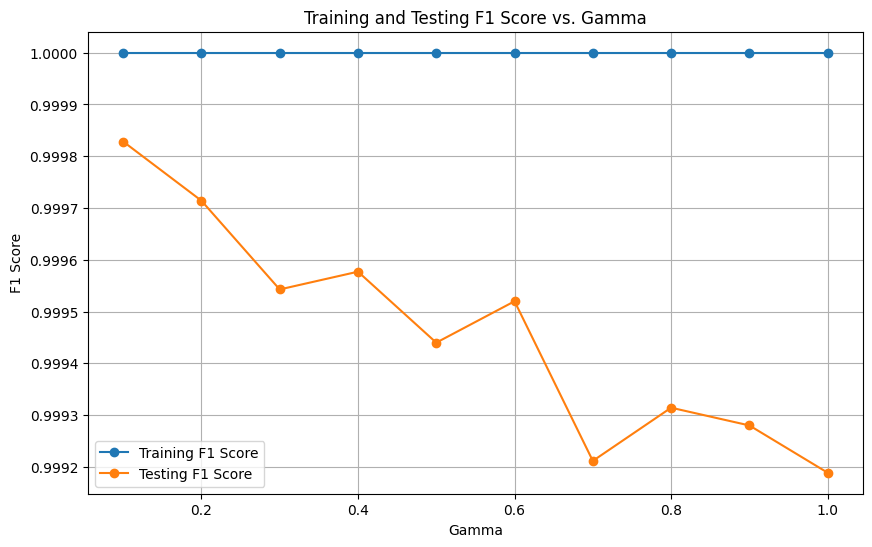

In [27]:
import matplotlib.pyplot as plt

# Extract gamma values and corresponding F1 scores for training and testing sets
gamma_values = list(train_metrics.keys())
train_f1_scores = [train_metrics[gamma]['F1'] for gamma in gamma_values]
test_f1_scores = [test_metrics[gamma]['F1'] for gamma in gamma_values]

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_f1_scores, marker='o', label='Training F1 Score')
plt.plot(gamma_values, test_f1_scores, marker='o', label='Testing F1 Score')
plt.xlabel('Gamma')
plt.ylabel('F1 Score')
plt.title('Training and Testing F1 Score vs. Gamma')
plt.legend()
plt.grid(True)
plt.show()
